In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X=pd.read_csv("/content/drive/MyDrive/Amex Comp/train_allx.csv")
y=pd.read_csv("/content/drive/MyDrive/Amex Comp/train_y.csv")

In [ ]:
str_columns=[ col  for col, dt in X.dtypes.items() if dt == object]
print(X[str_columns].isna().sum())
print(X[str_columns].nunique())

D_36        0
D_44    10037
dtype: int64
D_36    6
D_44    3
dtype: int64


In [ ]:
df=X.copy()
ysam=y.copy()
# df=df.sample(n=20000)
# ysam=ysam.iloc[df.index]

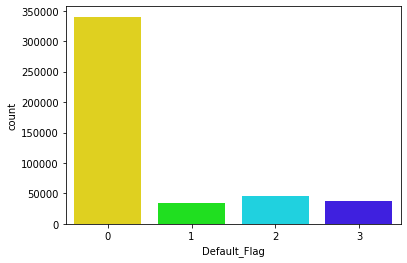

In [ ]:
sns.countplot(data = ysam, x='Default_Flag',palette='gist_rainbow')
plt.grid(False)
plt.savefig('ImbalancedDataset')
plt.show()

##Outlier

In [ ]:
num_feature=[feature for feature in df.columns if len(df[feature].unique())>100]

In [ ]:
from scipy.stats import iqr
for feature in num_feature:
  iqrange=iqr(df[feature])
  df[feature]=np.where(df[feature]>((iqrange*10)+np.quantile(df[feature],0.75)),(iqrange*10)+np.quantile(df[feature],0.75),df[feature])
  df[feature]=np.where(df[feature]>((-iqrange*10)+np.quantile(df[feature],0.25)),(iqrange*10)+np.quantile(df[feature],0.75),df[feature])

In [ ]:
for feature in num_feature:
  iqrange=iqr(df[feature])
  df.drop(df.loc[df[feature]>((iqrange*5)+np.quantile(df[feature],0.75))].index,inplace=True)
  df.drop(df.loc[df[feature]<((-iqrange*5)+np.quantile(df[feature],0.25))].index,inplace=True)

In [ ]:
df

,ID,B_37,S_24,S_4,S_14,B_25,D_38,B_30,D_138,P_2,...,D_43,D_4,D_85,D_78,D_42,D_52,D_29,R_1,R_28,S_5
2,9871378905,0.005405,0.005219,0.766602,0.284668,1.002930,NaN,0.005821,0.854980,0.927734,...,NaN,0.008736,0.008751,0.002541,0.009300,0.001654,0.000212,0.007599,0.009224,0.009636
6,1646892613,0.004860,0.000580,0.000179,0.000902,1.004883,NaN,0.003231,0.557617,0.714844,...,NaN,0.002382,0.000440,0.003067,0.002131,0.005116,0.007370,0.005394,0.008911,0.007622
7,3726705791,0.002806,0.009537,0.915039,0.690918,0.344238,NaN,0.035553,0.393066,1.006836,...,NaN,0.008347,0.003202,0.009621,0.005318,0.001795,0.009575,0.005142,0.000264,0.003929
15,5018314376,0.003416,0.002445,0.323242,0.005302,1.002930,NaN,0.014000,0.568848,0.890625,...,NaN,0.000673,0.008659,0.006836,0.007881,0.009682,0.009743,0.009422,0.003174,0.009628
17,1418563100,0.005955,0.006695,0.001607,0.004875,0.697266,NaN,0.006367,0.628418,0.859863,...,NaN,0.002544,0.009270,0.005520,0.003628,0.009254,0.008446,0.003258,0.002190,0.003664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458904,6142742452,0.003468,0.006512,0.003571,0.001212,1.000977,NaN,0.009354,0.453613,0.659668,...,NaN,0.002068,0.001407,0.008766,0.003717,0.002125,0.003628,0.009079,0.004948,0.006779
458905,1973284500,0.000939,0.007671,0.004066,0.004444,1.005859,NaN,0.008667,0.622559,0.965820,...,NaN,0.004364,0.001687,0.009903,0.002279,0.007904,0.002056,0.005268,0.000306,0.009895
458909,8870843234,0.006248,0.007683,0.003338,0.006954,1.004883,NaN,0.001700,0.575195,0.885254,...,NaN,0.008728,0.008682,0.008438,0.008392,0.006836,0.004223,0.008179,0.004337,0.003376
458911,1220825659,0.002348,0.005432,0.330078,0.003138,0.689941,NaN,0.001930,0.417969,0.846191,...,NaN,0.007492,0.009583,0.001172,0.005016,0.002506,0.009796,0.001634,0.009781,0.003271


##Dropping

In [ ]:
drop_cols=['D_38',
 'B_26',
 'D_17',
 'R_8',
 'D_73',
 'B_7',
 'B_22',
 'D_80',
 'D_97',
 'D_12',
 'D_132',
 'D_114',
 'D_96',
 'D_39',
 'D_43',
 'D_36',
 'D_44',
 "ID",
 'B_41',
 'D_83']

In [ ]:
# dum = pd.get_dummies(df[str_columns],dummy_na=True)
df.drop(columns=drop_cols, inplace=True)
# df.join(dum)

##Discrete Feature Handling

In [ ]:
discrete_feature=[feature for feature in df.columns if len(df[feature].unique())<100]
discrete_feature

['B_12',
 'D_17',
 'D_19',
 'D_48',
 'B_41',
 'B_13',
 'D_130',
 'D_47',
 'D_70',
 'D_83',
 'D_120']

In [ ]:
dum = pd.get_dummies(df[discrete_feature],dummy_na=True)
df.drop(columns=discrete_feature, inplace=True)
df.join(dum)

,ID,B_37,S_24,S_4,S_14,B_25,D_38,B_30,D_138,P_2,...,D_17,D_19,D_48,B_41,B_13,D_130,D_47,D_70,D_83,D_120
436974,6822083192,0.009323,0.006985,0.004669,0.001792,0.533203,NaN,0.009003,0.587891,0.596191,...,NaN,6.0,NaN,1,1.0,1,4.0,1.0,0.0,0.0
391765,5367139342,0.007942,0.006390,0.001493,0.009956,0.310059,NaN,0.394287,0.334473,0.862305,...,NaN,6.0,NaN,1,5.0,0,-1.0,1.0,0.0,0.0
392430,7848478220,0.005180,0.005348,0.492188,1.000000,1.002930,NaN,0.006435,0.446289,0.891113,...,NaN,6.0,NaN,1,5.0,1,5.0,1.0,0.0,0.0
121353,7184522676,0.001078,0.002390,0.006927,0.001817,1.000977,NaN,0.004223,0.489258,0.932129,...,NaN,6.0,NaN,1,1.0,1,4.0,0.0,0.0,0.0
451618,4473663837,0.003843,0.009865,0.859375,0.421875,0.095764,NaN,0.417969,0.564453,0.638672,...,NaN,6.0,NaN,1,4.0,1,-1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281375,1311660383,0.001160,0.003159,0.170044,0.687988,0.149780,NaN,0.355469,0.186035,0.646973,...,NaN,3.0,NaN,1,3.0,0,-1.0,0.0,0.0,0.0
92245,3920394538,0.004883,0.001904,0.357910,0.008278,0.647949,NaN,0.036072,0.204346,0.465820,...,NaN,5.0,NaN,1,1.0,0,-1.0,1.0,0.0,1.0
213626,4368425971,0.009163,0.000119,0.003904,0.006786,1.003906,NaN,0.008087,0.678711,0.852051,...,NaN,5.0,NaN,1,1.0,1,4.0,1.0,0.0,0.0
361508,2444227976,0.006733,0.003189,0.000046,0.007290,0.125610,NaN,0.249146,0.237061,0.580078,...,NaN,6.0,1.0,1,3.0,0,-1.0,0.0,0.0,0.0


##Feature Selection

###Constant Features

In [ ]:
def constant_feature_detect(data,threshold=0.98):
    """ detect features that show the same value for the
    majority/all of the observations (constant/quasi-constant features)

    Parameters
    ----------
    data : pd.Dataframe
    threshold : threshold to identify the variable as constant

    Returns
    -------
    list of variables names
    """

    data_copy = data.copy(deep=True)
    quasi_constant_feature = []
    for feature in data_copy.columns:
        predominant = (data_copy[feature].value_counts() / np.float(
                      len(data_copy))).sort_values(ascending=False).values[0]
        if predominant >= threshold:
            quasi_constant_feature.append(feature)
    print(len(quasi_constant_feature),' variables are found to be almost constant')
    return quasi_constant_feature

const_feat=constant_feature_detect(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


2  variables are found to be almost constant


In [ ]:
const_feat

['B_41', 'D_83']

###Chi-Squared

In [ ]:
from sklearn.metrics import accuracy_score
def univariate_roc_auc(X_train,y_train,X_test,y_test,threshold):

    """
    First, it builds one decision tree per feature, to predict the target
    Second, it makes predictions using the decision tree and the mentioned feature
    Third, it ranks the features according to the machine learning metric (roc-auc or mse)
    It selects the highest ranked features
    """
    roc_values = []
    for feature in X_train.columns:
        clf = LGBMClassifier()
        clf.fit(X_train[feature].to_frame(), y_train)
        y_scored = clf.predict(X_test[feature].to_frame())
        roc_values.append(accuracy_score(y_test, y_scored))
    roc_values = pd.Series(roc_values)
    roc_values.index = X_train.columns
    print(roc_values.sort_values(ascending=False))
    print(len(roc_values[roc_values > threshold]),'out of the %s featues are kept'% len(X_train.columns))
    keep_col = roc_values[roc_values > threshold]
    return keep_col
cols=univariate_roc_auc(X_train,y_train,X_test,y_test,threshold=0.3)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

ValueError: ignored

##Model

###Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,ysam,stratify=ysam,shuffle=True,test_size=0.2)

###LGBM

In [ ]:
from lightgbm import LGBMClassifier
para={'n_estimators': 334, 'max_depth': 79, 'learning_rate': 0.08210741586494268, 'subsample': 0.2862553406171706, 'colsample_bytree': 0.20427795921406}
#para={'n_estimators': 642, 'max_depth': 6, 'learning_rate': 0.1210810054611185, 'subsample': 0.3470188236080748, 'colsample_bytree': 0.9420806324339395}
model=LGBMClassifier(**para)

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(colsample_bytree=0.20427795921406,
               learning_rate=0.08210741586494268, max_depth=79,
               n_estimators=334, subsample=0.2862553406171706)

###Feature Importance

In [ ]:
top_n=120
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feat_labels = X_train.columns
# std = np.std([tree[0].feature_importances_ for tree in model.estimators_],
#               axis=0) #  inter-trees variability.
print("Feature ranking:")
#    l1,l2,l3,l4 = [],[],[],[]
for f in range(X_train.shape[1]):
    print("%d. feature no:%d feature name:%s (%f)" % (f + 1, indices[f], feat_labels[indices[f]], importances[indices[f]]))
#        l1.append(f+1)
#        l2.append(indices[f])
#        l3.append(feat_labels[indices[f]])
#        l4.append(importances[indices[f]])
#    feature_rank = pd.Dataframe(zip(l1,l2,l3,l4),columns=['id','indice','feature','importances'])
# plotting
indices = indices[0:top_n]
plt.figure()
plt.title("Feature importances top %d" % top_n)
plt.bar(range(top_n), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(top_n), indices)
plt.xlim([-1,top_n])
plt.show()

Feature ranking:
1. feature no:9 feature name:P_2 (1604.000000)
2. feature no:48 feature name:D_68 (861.000000)
3. feature no:29 feature name:B_29 (828.000000)
4. feature no:49 feature name:D_89 (821.000000)
5. feature no:10 feature name:S_7 (757.000000)
6. feature no:28 feature name:B_21 (745.000000)
7. feature no:22 feature name:B_3 (738.000000)
8. feature no:102 feature name:R_19 (714.000000)
9. feature no:33 feature name:B_9 (701.000000)
10. feature no:50 feature name:D_8 (682.000000)
11. feature no:87 feature name:R_4 (663.000000)
12. feature no:63 feature name:D_34 (661.000000)
13. feature no:8 feature name:D_138 (655.000000)
14. feature no:115 feature name:R_11 (644.000000)
15. feature no:55 feature name:D_17 (631.000000)
16. feature no:7 feature name:B_30 (621.000000)
17. feature no:24 feature name:B_12 (611.000000)
18. feature no:13 feature name:D_99 (596.000000)
19. feature no:117 feature name:D_56 (576.000000)
20. feature no:111 feature name:D_65 (561.000000)
21. feature no:

IndexError: ignored

###test eval

In [ ]:
ypred=model.predict(X_test)

In [ ]:
ytrain_pred=model.predict(X_train)
print(classification_report(y_train,ytrain_pred))
accuracy_score(y_train,ytrain_pred)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,ypred))
accuracy_score(y_test,ypred)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     68017
           1       0.73      0.58      0.65      6900
           2       0.42      0.51      0.46      9285
           3       0.35      0.09      0.14      7581

    accuracy                           0.82     91783
   macro avg       0.60      0.54      0.54     91783
weighted avg       0.79      0.82      0.80     91783



0.8172319492716517

In [ ]:
from lightgbm import LGBMClassifier
para={'n_estimators': 334, 'max_depth': 79, 'learning_rate': 0.08210741586494268, 'subsample': 0.2862553406171706, 'colsample_bytree': 0.20427795921406}
model_full=LGBMClassifier(**para)

In [ ]:
model_full.fit(df,ysam)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(colsample_bytree=0.20427795921406,
               learning_rate=0.08210741586494268, max_depth=79,
               n_estimators=334, subsample=0.2862553406171706)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred)

array([[65615,   295,  1720,   387],
       [  922,  3908,  1968,   102],
       [ 3176,   808,  4835,   466],
       [ 3688,   350,  3011,   532]])

In [ ]:
from lightgbm import LGBMClassifier
para={'n_estimators': 334, 'max_depth': 79, 'learning_rate': 0.08210741586494268, 'subsample': 0.2862553406171706, 'colsample_bytree': 0.20427795921406}
model=LGBMClassifier(**para)

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(colsample_bytree=0.20427795921406,
               learning_rate=0.08210741586494268, max_depth=79,
               n_estimators=334, subsample=0.2862553406171706)

In [ ]:
ypred=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,ypred))
accuracy_score(y_test,ypred)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     68017
           1       0.73      0.58      0.64      6900
           2       0.42      0.51      0.46      9285
           3       0.36      0.09      0.15      7581

    accuracy                           0.82     91783
   macro avg       0.60      0.54      0.55     91783
weighted avg       0.79      0.82      0.80     91783



0.8179074556290381

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 5.1 MB/s 
     |████████████████████████████████| 209 kB 38.1 MB/s 
     |████████████████████████████████| 81 kB 8.8 MB/s 
     |████████████████████████████████| 78 kB 7.8 MB/s 
     |████████████████████████████████| 147 kB 65.5 MB/s 
     |████████████████████████████████| 112 kB 39.0 MB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=5e4d327c1eb908106bf6ddee06114ad7850e52e5daec451661722b0129dbe117
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 5.0.0
    Uninstalling importlib-metadata-5.0.0:
      Successfully uninstalled importlib-metadata-5.0.0


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k_fold=KFold(5)
def objective_LightGBM(trial):
      n_estimators_values = trial.suggest_int('n_estimators', 10, 1000)
      max_depth_values = trial.suggest_int('max_depth', 1, 100)
      learning_rate_values = trial.suggest_float('learning_rate', 0.01, 0.3)
      subsample_values = trial.suggest_float('subsample', 0.2, 1)
      colsample_bytree_values = trial.suggest_float('colsample_bytree', 0.2, 1)
      clf = LGBMClassifier(
                          n_estimators=n_estimators_values,
                          max_depth=max_depth_values,
                          learning_rate=learning_rate_values,
                          subsample=subsample_values,
                          colsample_bytree=colsample_bytree_values)
      model_f1scores = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = k_fold, scoring = 'accuracy')
      return model_f1scores.mean()


study = optuna.create_study(direction='maximize')
study.optimize(objective_LightGBM, n_trials=40)

trial = study.best_trial
print('Best F1 score: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-10-18 11:01:46,572] A new study created in memory with name: no-name-7cccb339-901d-4b91-bd7d-968749772cc3
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWar

KeyboardInterrupt: ignored

###XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_clf=XGBClassifier(learning_rate=0.1)
xgb_clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

In [ ]:
ypred=xgb_clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,ypred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.97      0.92      3703\n           1       0.71      0.54      0.62       365\n           2       0.44      0.50      0.47       512\n           3       0.31      0.06      0.10       420\n\n    accuracy                           0.81      5000\n   macro avg       0.59      0.52      0.53      5000\nweighted avg       0.78      0.81      0.79      5000\n'

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.8132

###2 Models

In [ ]:
def bina(value):
  if value == 0:
    return 0
  else:
    return 1
ytrain_bin = y_train['Default_Flag'].map(bina)
ytest_bin=y_test['Default_Flag'].map(bina)

In [ ]:
from lightgbm import LGBMClassifier
para={'n_estimators': 334, 'max_depth': 79, 'learning_rate': 0.08210741586494268, 'subsample': 0.2862553406171706, 'colsample_bytree': 0.20427795921406}
model_split1=LGBMClassifier(**para)

In [ ]:
model_split1.fit(X_train,ytrain_bin)

LGBMClassifier(colsample_bytree=0.20427795921406,
               learning_rate=0.08210741586494268, max_depth=79,
               n_estimators=334, subsample=0.2862553406171706)

In [ ]:
ypred=model_split1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(ytest_bin,ypred))
accuracy_score(ytest_bin,ypred)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     68017
           1       0.81      0.81      0.81     23766

    accuracy                           0.90     91783
   macro avg       0.87      0.87      0.87     91783
weighted avg       0.90      0.90      0.90     91783



0.9006351938812198

In [ ]:
ytrain_def=y_train.loc[y_train['Default_Flag']!=0]
ytest_def=y_test.loc[y_test['Default_Flag']!=0]
X_train_def=X_train.loc[ytrain_def.index]
X_test_def=X_test.loc[ytest_def.index]

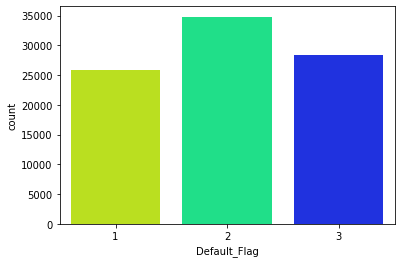

In [ ]:
sns.countplot(data = ytrain_def, x='Default_Flag',palette='gist_rainbow')
plt.grid(False)
plt.show()

In [ ]:
para={'n_estimators': 334, 'max_depth': 79, 'learning_rate': 0.08210741586494268, 'subsample': 0.2862553406171706, 'colsample_bytree': 0.20427795921406}
model_split2=LGBMClassifier(**para)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_split2=RandomForestClassifier()

In [ ]:
ypred=model_split2.predict(X_test_def)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(ytest_def,ypred))
accuracy_score(ytest_def,ypred)

              precision    recall  f1-score   support

           1       0.74      0.59      0.66      6900
           2       0.48      0.63      0.55      9285
           3       0.53      0.43      0.47      7581

    accuracy                           0.55     23766
   macro avg       0.58      0.55      0.56     23766
weighted avg       0.57      0.55      0.56     23766



0.5540267609189599

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest_def,ypred)

array([[5176, 2712,  737],
       [1322, 6925, 3359],
       [ 536, 4719, 4221]])

In [ ]:
ypred1=model_split1.predict(X_test)
ypred1=pd.DataFrame(ypred1)
y1=ypred1.loc[ypred1[0]!=0]
X1=X_test.iloc[y1.index]

In [ ]:
ypred2=model_split2.predict(X1)
ypred2=pd.DataFrame(ypred2)

In [ ]:
ypred1=ypred1.loc[ypred1[0]==0]

In [ ]:
miss_index=list(set(range(len(X_test)))-set(ypred1.index))

In [ ]:
ypred2["index"]=miss_index
ypred2=ypred2.set_index('index')

In [ ]:
ypred_final=ypred1.reindex(range(len(X_test))).fillna(ypred2)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,ypred_final))
accuracy_score(y_test,ypred_final)

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     68017
           1       0.69      0.59      0.63      6900
           2       0.37      0.58      0.45      9285
           3       0.27      0.31      0.29      7581

    accuracy                           0.79     91783
   macro avg       0.57      0.59      0.58     91783
weighted avg       0.82      0.79      0.80     91783



0.785526731529804

##Validation dataset

In [ ]:
val=pd.read_csv("/content/drive/MyDrive/Amex Comp/val_allx.csv")

In [ ]:
dum = pd.get_dummies(val[str_columns],dummy_na=True)
val.drop(columns=str_columns, inplace=True)
val.join(dum)

,ID,B_37,S_24,S_4,S_14,B_25,D_38,B_30,D_138,P_2,...,D_36_CO,D_36_CR,D_36_XL,D_36_XM,D_36_XZ,D_36_nan,D_44_O,D_44_R,D_44_U,D_44_nan
0,3337446730,0.007183,0.008255,0.768600,0.284000,1.005000,NaN,0.01746,0.3623,0.84130,...,1,0,0,0,0,0,1,0,0,0
1,7888784125,0.002203,0.008860,0.479000,0.697800,0.149800,NaN,0.18530,0.1719,0.51300,...,0,0,0,0,0,0,0,1,0,0
2,9871378905,0.001282,0.000458,0.006035,0.002628,0.008965,NaN,0.61130,0.2656,0.35130,...,1,0,0,0,0,0,1,0,0,0
3,8891869609,0.008720,0.006454,0.752400,0.686000,0.052980,NaN,0.63600,0.2722,0.30710,...,1,0,0,0,0,0,0,0,1,0
4,2006443827,0.000901,0.008650,0.486300,0.696300,0.530300,NaN,0.65300,0.6680,0.49170,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467961,5512100313,0.004086,0.000147,0.329600,0.002620,0.294400,NaN,0.24620,0.1800,0.03317,...,1,0,0,0,0,0,0,0,1,0
467962,2488191588,0.008910,0.000919,0.009230,0.006115,1.003000,NaN,0.00838,0.5503,0.84200,...,1,0,0,0,0,0,1,0,0,0
467963,4896427435,0.009766,0.008220,0.323700,0.284200,0.098800,NaN,0.56000,0.1959,0.15650,...,1,0,0,0,0,0,0,1,0,0
467964,9244915426,0.009980,0.005333,0.486000,0.510700,0.696000,NaN,0.06640,0.8833,0.82500,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
val.drop(columns=drop_cols,inplace=True)

In [ ]:
ysub=model_full.predict(val)

In [ ]:
ysub=pd.DataFrame(ysub)
ysub["ID"]=val["ID"]

In [ ]:
ysub=ysub.iloc[:,[1,0]]

In [ ]:
ysub.to_csv('y1910_tuned_full.csv',header=False,index=False)

In [ ]:
ysub

,ID,0
0,3337446730,0
1,7888784125,0
2,9871378905,2
3,8891869609,0
4,2006443827,0
...,...,...
467961,5512100313,1
467962,2488191588,0
467963,4896427435,2
467964,9244915426,0
